In [65]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re
import neattext.functions as nfx
# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


In [66]:



# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 80



In [67]:
#data=pd.read_csv('dataset/isear.csv')
#data=pd.read_csv('dataset/dailydialog.csv')
data=pd.read_csv('dataset/emotion-stimulus.csv')
#data=pd.read_csv('dataset/text_emotion.csv')

In [68]:
data['Emotion'].value_counts()

sad         575
anger       483
happy       479
fear        423
surprise    213
shame       146
disgust      95
Name: Emotion, dtype: int64

In [69]:

dir(nfx)




['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [70]:

data['Clean_Text']=data['Text'].apply(nfx.remove_special_characters)

In [71]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_punctuations)

In [72]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_stopwords)

In [73]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_userhandles)

In [74]:
data[['Text','Clean_Text']]

,Text,Clean_Text
0,I suppose I am happy being so ` tiny' ; it mea...,suppose happy tiny means able surprise people ...
1,Lennox has always truly wanted to fight for th...,Lennox truly wanted fight world title happy ta...
2,"He was a professional musician now , still sen...",professional musician sensitive happy loved
3,Holmes is happy having the freedom of the hous...,Holmes happy freedom house
4,I had problems with tutors trying to encourage...,problems tutors trying encourage diversity wor...
...,...,...
2409,He gets real humiliated and has to leave .,gets real humiliated leave
2410,They aimed for higher status jobs and felt hum...,aimed higher status jobs felt humiliated unemp...
2411,He cursed his lack of self-control ; he knew t...,cursed lack selfcontrol knew old biddies seen ...
2412,Sometimes I've thought I 'll never forget wha...,Ive thought forget happened comes feel guilty ...


In [75]:
data['Emotion'].value_counts()

sad         575
anger       483
happy       479
fear        423
surprise    213
shame       146
disgust      95
Name: Emotion, dtype: int64

In [76]:
#Daily Dialog:

sent_to_id  = {"sad":0, "anger":1, "happy":2, "fear":3, "surprise":4, "shame":5, "disgust":6}


#Isear:
#sent_to_id  = {"joy":0, "fear":1, "anger":2, "sadness":3, "disgust":4, "shame":5, "guilt":6}

# Tweet Emotion:
 #sent_to_id  = {"neutral":0, "worry":1, "happiness":2, "sadness":3, "love":4, "surprise":5, "fun":6, "relief":7, "hate":8, "empty":9, "enthusiasm":10, "boredom":11, "anger":12}

In [77]:
data["sentiment_id"] = data['Emotion'].map(sent_to_id)

In [78]:
data["sentiment_id"]

0       2
1       2
2       2
3       2
4       2
       ..
2409    5
2410    5
2411    5
2412    5
2413    5
Name: sentiment_id, Length: 2414, dtype: int64

In [79]:
data

,Emotion,Text,Clean_Text,sentiment_id
0,happy,I suppose I am happy being so ` tiny' ; it mea...,suppose happy tiny means able surprise people ...,2
1,happy,Lennox has always truly wanted to fight for th...,Lennox truly wanted fight world title happy ta...,2
2,happy,"He was a professional musician now , still sen...",professional musician sensitive happy loved,2
3,happy,Holmes is happy having the freedom of the hous...,Holmes happy freedom house,2
4,happy,I had problems with tutors trying to encourage...,problems tutors trying encourage diversity wor...,2
...,...,...,...,...
2409,shame,He gets real humiliated and has to leave .,gets real humiliated leave,5
2410,shame,They aimed for higher status jobs and felt hum...,aimed higher status jobs felt humiliated unemp...,5
2411,shame,He cursed his lack of self-control ; he knew t...,cursed lack selfcontrol knew old biddies seen ...,5
2412,shame,Sometimes I've thought I 'll never forget wha...,Ive thought forget happened comes feel guilty ...,5


In [80]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data.Emotion)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [81]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [82]:
Xfeatures=data['Clean_Text']

In [83]:
final = data[['Clean_Text', 'Emotion']]
print("Train DataFrame")
display(final.head(3))

Train DataFrame


,Clean_Text,Emotion
0,suppose happy tiny means able surprise people ...,happy
1,Lennox truly wanted fight world title happy ta...,happy
2,professional musician sensitive happy loved,happy


In [84]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeatures,Y, random_state=42, test_size=0.2, shuffle=True)

In [85]:
from keras.preprocessing import sequence, text
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
token = text.Tokenizer()
token.fit_on_texts(list(X_train) + list(X_test))

index_of_words = token.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=max_seq_len)
X_test_pad = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=max_seq_len)

Number of unique words: 7327


In [86]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath,encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [87]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r',encoding="utf8") as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

In [88]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(7328, 300)

In [89]:
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 6776
New words found: 551


In [90]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [101]:
#LSTM
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
gru_output_size = 128
bidirectional = False

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(7, activation='softmax'))

#cnn
#kernel_size = 3
#filters = 256

#model = Sequential()
#model.add(embedd_layer)
#model.add(Conv1D(filters, kernel_size, activation='relu'))
#model.add(GlobalMaxPooling1D())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(13, activation='softmax'))

In [102]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 80, 300)           2198400   
                                                                 
 gru_9 (GRU)                 (None, 128)               165120    
                                                                 
 dense_9 (Dense)             (None, 7)                 903       
                                                                 
Total params: 2,364,423
Trainable params: 166,023
Non-trainable params: 2,198,400
_________________________________________________________________


In [106]:
batch_size = 128
epochs = 20

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/20
16/16 [==============================] - 8s 494ms/step - loss: 0.0335 - accuracy: 0.9907 - val_loss: 0.1602 - val_accuracy: 0.9586
Epoch 2/20
16/16 [==============================] - 8s 481ms/step - loss: 0.0346 - accuracy: 0.9922 - val_loss: 0.1958 - val_accuracy: 0.9586
Epoch 3/20
16/16 [==============================] - 8s 484ms/step - loss: 0.0331 - accuracy: 0.9933 - val_loss: 0.1558 - val_accuracy: 0.9607
Epoch 4/20
16/16 [==============================] - 8s 480ms/step - loss: 0.0331 - accuracy: 0.9933 - val_loss: 0.1639 - val_accuracy: 0.9627
Epoch 5/20
16/16 [==============================] - 8s 483ms/step - loss: 0.0281 - accuracy: 0.9922 - val_loss: 0.1608 - val_accuracy: 0.9586
Epoch 6/20
16/16 [==============================] - 8s 478ms/step - loss: 0.0277 - accuracy: 0.9953 - val_loss: 0.1616 - val_accuracy: 0.9607
Epoch 7/20
16/16 [==============================] - 8s 488ms/step - loss: 0.0307 - accuracy: 0.9948 - val_loss: 0.1611 - val_accuracy: 0.9648
Epoch 

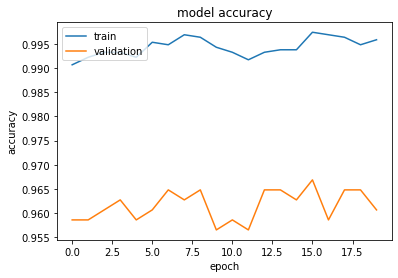

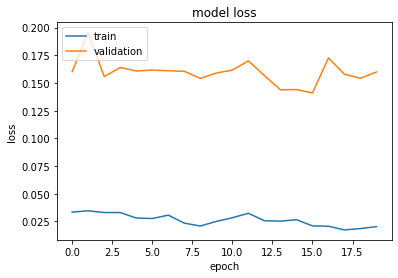

In [108]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn import metrics

y_test_arg=np.argmax(y_test,axis=1)

predicted = model.predict(X_test_pad)
predict_classes=np.argmax(predicted,axis=1)
predict_classes[1]                        
print('Confusion Matrix')
print(metrics.classification_report(y_test_arg, predict_classes))

Confusion Matrix
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       116
           1       1.00      0.77      0.87        22
           2       0.91      0.93      0.92        76
           3       1.00      0.96      0.98        79
           4       0.94      0.99      0.97       118
           5       0.94      1.00      0.97        29
           6       1.00      0.95      0.98        43

    accuracy                           0.96       483
   macro avg       0.97      0.94      0.95       483
weighted avg       0.96      0.96      0.96       483

